In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv
/kaggle/input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv
/kaggle/input/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv
/kaggle/input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv


In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# display column limit
pd.set_option('display.max_columns',100)

In [4]:
import pandas as pd
kiva_loans = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/kiva_loans.csv")
kiva_mpi_region_locations = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv")
loan_theme_ids = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv")
loan_themes_by_region = pd.read_csv("../input/data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv")

In [5]:
# look at the data
kiva_loans.head(3)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01


1. The distribution of funded_amount.
2. Most frequent activity used for loan.
3. Top sectors funded.
4. Countries with the most borrowers.
5. Frequent regions where borrowers reside.
6. The most frequent partner_ids.
7. Gender of the frequent borrowers.
8. Most method of repayment overall

In [6]:
kiva_loans.shape

(671205, 20)

In [7]:
# exploratory data on kiva_loans
kiva_loans.isnull().sum()

id                         0
funded_amount              0
loan_amount                0
activity                   0
sector                     0
use                     4232
country_code               8
country                    0
region                 56800
currency                   0
partner_id             13507
posted_time                0
disbursed_time          2396
funded_time            48331
term_in_months             0
lender_count               0
tags                  171416
borrower_genders        4221
repayment_interval         0
date                       0
dtype: int64

In [8]:
kiva_loans.duplicated().sum()

0

In [9]:
kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


In [10]:
kiva_loans.dtypes

id                      int64
funded_amount         float64
loan_amount           float64
activity               object
sector                 object
use                    object
country_code           object
country                object
region                 object
currency               object
partner_id            float64
posted_time            object
disbursed_time         object
funded_time            object
term_in_months        float64
lender_count            int64
tags                   object
borrower_genders       object
repayment_interval     object
date                   object
dtype: object

In [11]:
kiva_loans.shape

(671205, 20)

In [12]:
kiva_loans.head(2)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01


In [13]:
kiva_loans.drop(['loan_amount','use','country_code','currency','tags','posted_time','disbursed_time','funded_time','date'],axis=1,inplace=True)
kiva_loans.head()

,id,funded_amount,activity,sector,country,region,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval
0,653051,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,12.0,12,female,irregular
1,653053,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,11.0,14,"female, female",irregular
2,653068,150.0,Transportation,Transportation,India,Maynaguri,334.0,43.0,6,female,bullet
3,653063,200.0,Embroidery,Arts,Pakistan,Lahore,247.0,11.0,8,female,irregular
4,653084,400.0,Milk Sales,Food,Pakistan,Abdul Hakeem,245.0,14.0,16,female,monthly


# EDA

1.Univariate Analysis

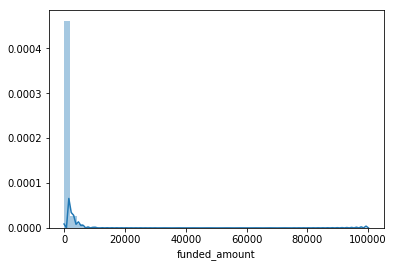

In [14]:
# Distribution of funded_amount
sns.distplot(kiva_loans['funded_amount'])
plt.show()

Text(0.5, 1.0, 'top 10 activity used for loans')

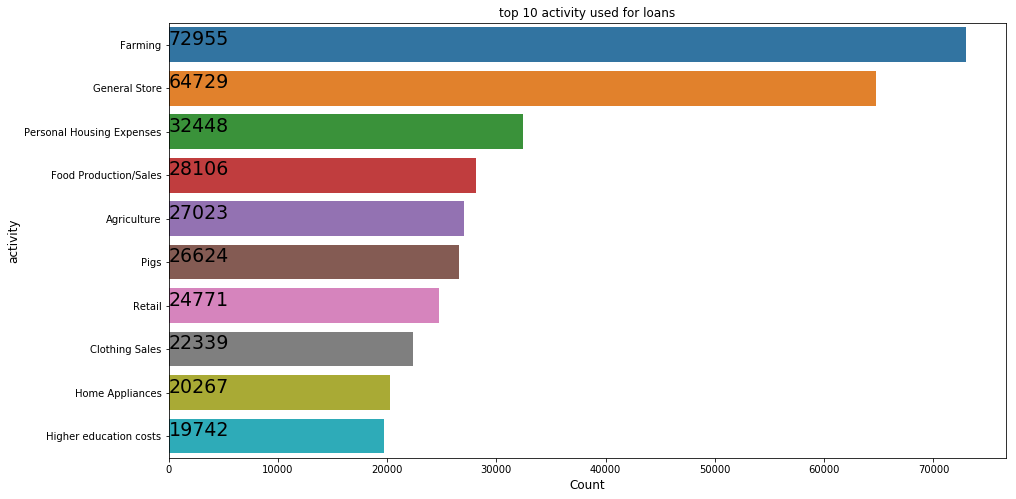

In [15]:
# Most frequent activity used for loan
plt.figure(figsize=(15,8))
count = kiva_loans['activity'].value_counts().head(10)
sns.barplot(count.values, count.index, )
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=19)
plt.xlabel('Count',fontsize=12)
plt.ylabel('activity', fontsize=12)
plt.title('top 10 activity used for loans')

Text(0.5, 1.0, 'top 10 sectors funded')

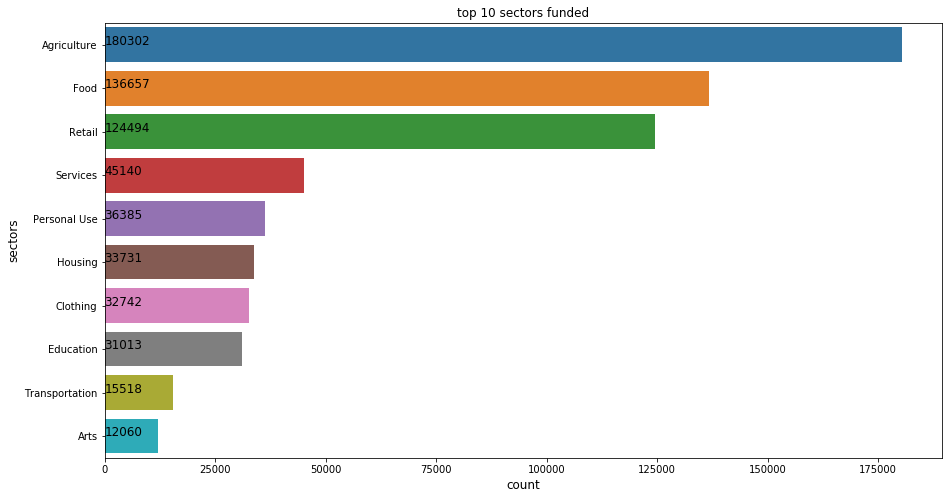

In [16]:
# Top sectors funded.
plt.figure(figsize=(15,8))
count = kiva_loans['sector'].value_counts().head(10)
sns.barplot(count.values, count.index,)
for i, v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('count',fontsize=12)
plt.ylabel('sectors',fontsize=12)
plt.title('top 10 sectors funded', fontsize=12)


Text(0.5, 1.0, 'top 10 country with highest borrowers')

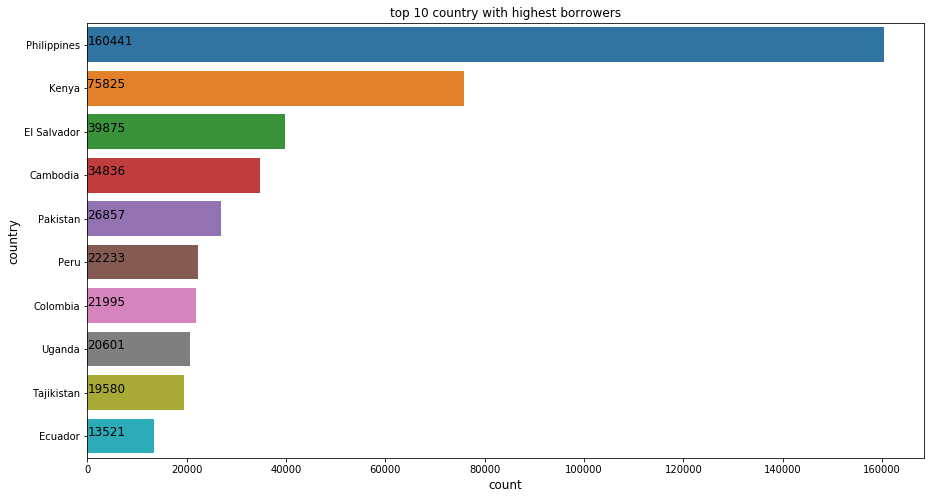

In [17]:
# Countries with the most borrowers.
plt.figure(figsize=(15,8))
count = kiva_loans['country'].value_counts().head(10)
sns.barplot(count.values, count.index,)
for i,v in enumerate (count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('count',fontsize=12)
plt.ylabel('country',fontsize=12)
plt.title('top 10 country with highest borrowers')

Text(0.5, 1.0, 'top 10 regions with borrowers')

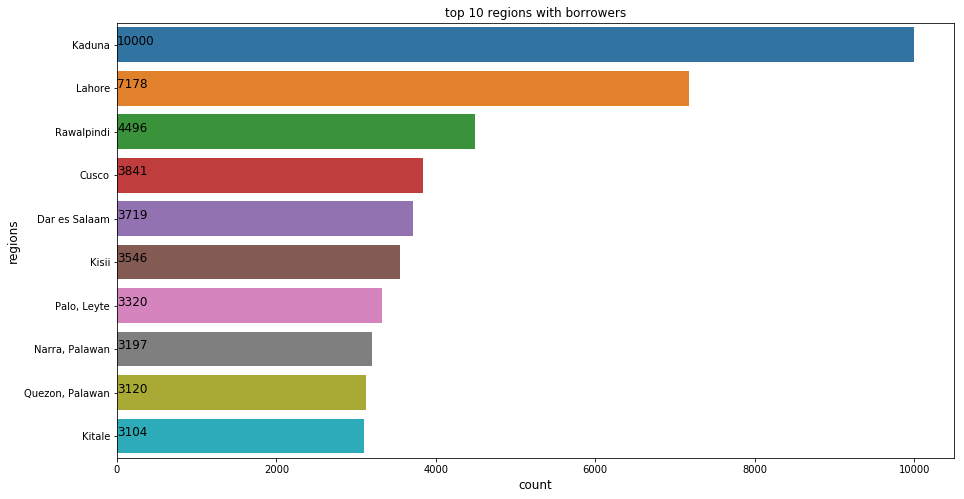

In [18]:
#Frequent regions where borrowers reside.
plt.figure(figsize=(15,8))
count = kiva_loans['region'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i,v in enumerate(count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('count',fontsize=12)
plt.ylabel('regions',fontsize=12)
plt.title('top 10 regions with borrowers')

Text(0.5, 1.0, 'top 10 partner_ids')

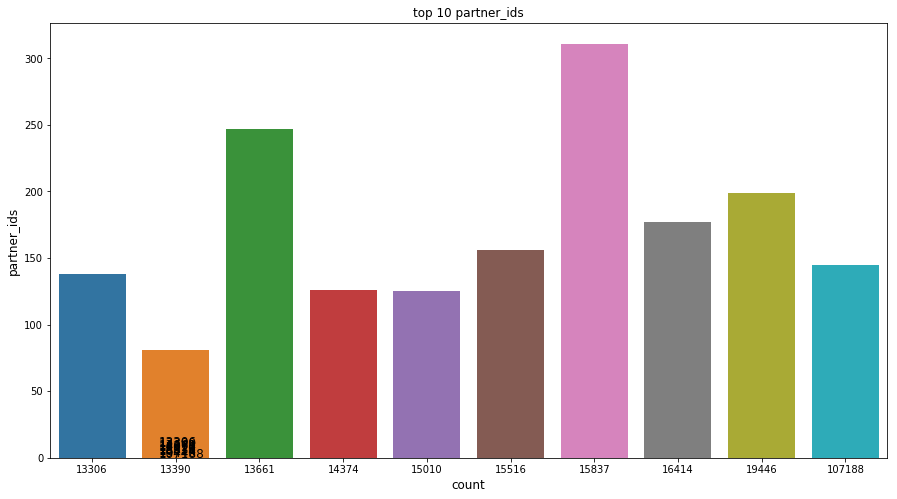

In [19]:
# The most frequent partner_ids.
plt.figure(figsize=(15,8))
count = kiva_loans['partner_id'].value_counts().head(10)
sns.barplot(count.values, count.index)
for i,v in enumerate (count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('count',fontsize=12)
plt.ylabel('partner_ids',fontsize=12)
plt.title('top 10 partner_ids')

In [20]:
# gender of the frequent borrowers.
kiva_loans['female_gender'] = kiva_loans['borrower_genders'].str.contains('female')
# create a gender column
kiva_loans.loc[kiva_loans['female_gender'] == True, 'gender'] = 'Female'
kiva_loans.loc[kiva_loans['female_gender'] == False, 'gender'] = 'Male'
# drop irrelevant columns
kiva_loans.drop(['borrower_genders', 'female_gender'], axis=1, inplace=True)

Text(0.5, 1.0, 'gender of borrowers')

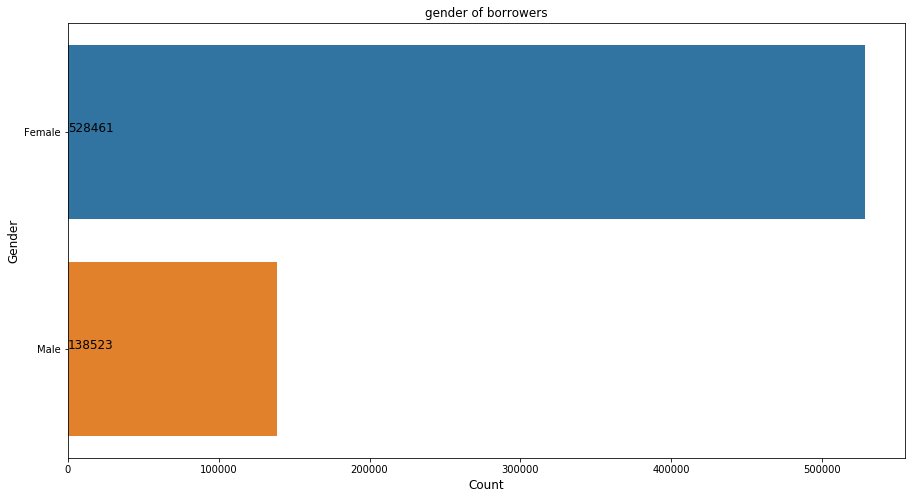

In [21]:
plt.figure(figsize=(15,8))
count = kiva_loans['gender'].value_counts()
sns.barplot(count.values,count.index,)
for i,v in enumerate (count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Gender',fontsize=12)
plt.title('gender of borrowers')

Text(0.5, 1.0, 'Frequency of Repayment Methods')

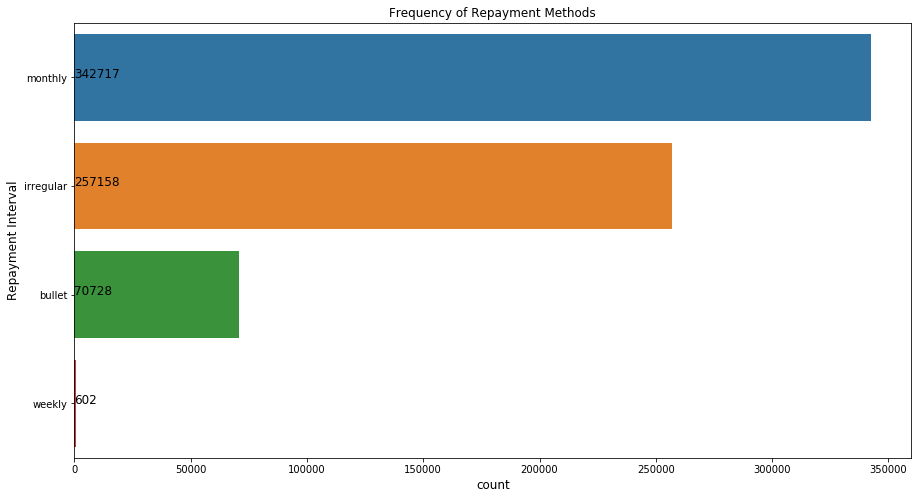

In [22]:
# Most method of repayment overall
plt.figure(figsize=(15,8))
count = kiva_loans['repayment_interval'].value_counts().head(10)
sns.barplot(count.values,count.index,)
for i,v in enumerate (count.values):
    plt.text(0.8,i,v,color='k',fontsize=12)
plt.xlabel('count',fontsize=12)
plt.ylabel('Repayment Interval',fontsize=12)
plt.title('Frequency of Repayment Methods',fontsize=12)

2. Multivariate Analysis

1. gender per country.
2. gender per sector
3.

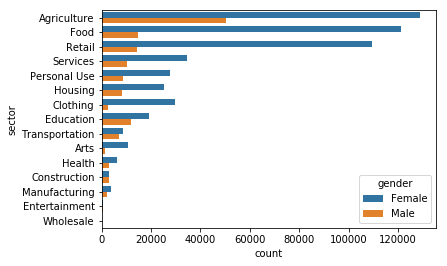

In [23]:
# Gender and sector
sns.countplot(y='sector',data=kiva_loans, hue='gender', order= kiva_loans['sector'].value_counts().index)

top sector in borrowing is agriculture. Female are the top borrowers in the top 10 list of sectors borrowed

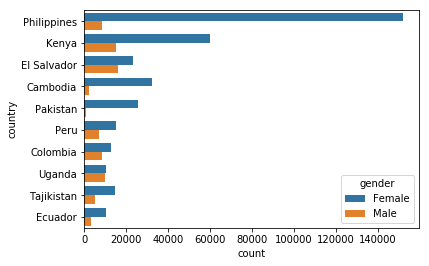

In [24]:
# gender and coutry 
count = sns.countplot(y='country',data=kiva_loans,hue='gender',order=kiva_loans['country'].value_counts().iloc[:10].index)

In [25]:
kiva_loans.head(3)

,id,funded_amount,activity,sector,country,region,partner_id,term_in_months,lender_count,repayment_interval,gender
0,653051,300.0,Fruits & Vegetables,Food,Pakistan,Lahore,247.0,12.0,12,irregular,Female
1,653053,575.0,Rickshaw,Transportation,Pakistan,Lahore,247.0,11.0,14,irregular,Female
2,653068,150.0,Transportation,Transportation,India,Maynaguri,334.0,43.0,6,bullet,Female


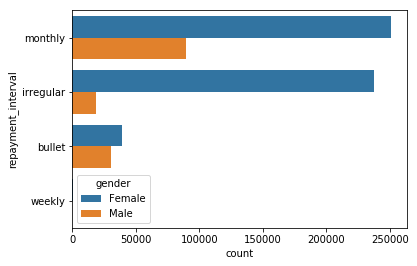

In [26]:
sns.countplot(y='repayment_interval',data=kiva_loans,hue='gender',order=kiva_loans['repayment_interval'].value_counts().index)

In [45]:
# Most method of repayment overall
kiva_loans['lender_count'].value_counts().iloc[:15].index

Int64Index([8, 7, 9, 1, 5, 6, 10, 11, 12, 4, 13, 14, 3, 16, 15], dtype='int64')

Text(0.5, 1.0, 'top 10 regions with borrowers')

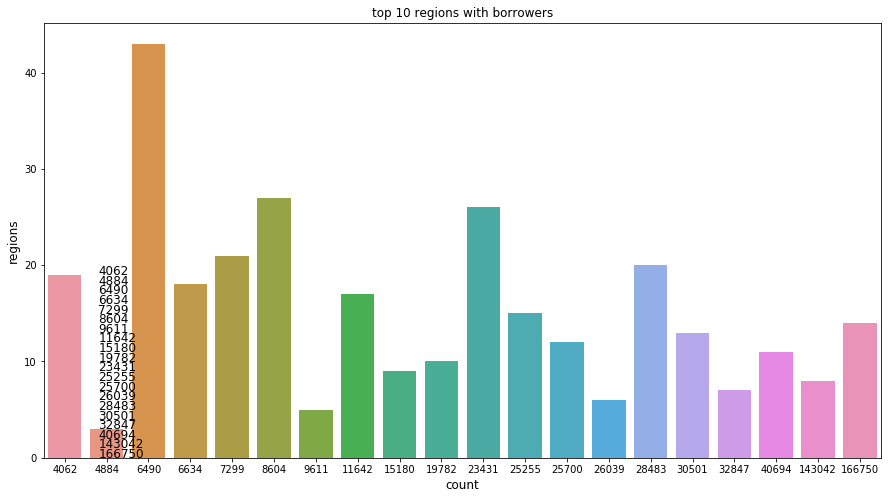

In [38]:
# term_in_months
kiva_loans.term_in_months.unique()